## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/SEDataScience/kc_house_data.csv")

data.head(150)

Mounted at /content/drive


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,20141203T000000,921500.0,4,2.50,3670,315374,2.0,0,0,4,9,3670,0,1994,0,98077,47.7421,-122.026
146,20140625T000000,890000.0,4,1.00,2550,4000,2.0,0,0,3,8,2370,180,1905,0,98109,47.6354,-122.353
147,20140806T000000,430000.0,2,2.50,2420,60984,2.0,0,0,3,7,2420,0,2007,0,98027,47.5262,-121.943
148,20141030T000000,258000.0,5,2.00,2260,12500,1.0,0,0,4,8,1130,1130,1960,0,98032,47.3887,-122.286


Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?


1) A machine learning pipeline is a collection of components used to process, manipulate, and transform data. They work asynchronously, meaning that copmonents will pull large amounts of data and work on them, storing the output in another data store. This is done to automate and control the work- and dataflow. An example of this would be the Scikit pipeline class which allows for easier transformation of input data.

2) The task of this program is a supervised learning task. This can be seen as the model is being given an input, namely datasets covering, among others, the square footage, number of rooms, and the year it was built including the expected outcome of price of the house.
Additionally, the task is regression rather than classified because it works with contiuous predictions or quantities. Here we use batch learning due to the simplicity of the model. 

3) Under the term “performance measure” we understand a defined variable that is used to evaluate the machine learning algorithm. Two examples of performance measures in regression models are the root mean square error (RMSE) and the mean absolute error (MAE). In the case of linear regression, these measures can be interpreted as an indication of error frequencies in the system's predictions. The MAE is similar, however it is best used when working with outliers.


##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

In [ ]:
# YOUR TASK
#data.head(15)
#data.describe()
data.info()
#data.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

1) Variables: categorical, ordinal, numeric?:

- date: numeric
- price: numeric
- bedrooms: numeric
- bathrooms: numeric
- sqft_living: numeric
- sqft_lot: numeric
- floors: numeric
- waterfront: categorical (limited number of possibilites, eg. yes or no/ 1 or 0)
- view: numeric 
- condition: ordinal (ordered categories, such as low- high/ good- bad)
- grade: ordinal 
- sqft_above: numeric
- sqft_basement: numeric
- yr_built: numeric
- yr_renovated: categorical (0 for hasn't happened, year for when it did)
- zipcode: categorical
- lat: numeric
- long: numeric

2) Waterfront vs. yr_renovated:
While the variables waterfront and yr_renovated are both categorical variables, they differ in output. It appears that waterfronts lists whether or not the house has a view of the water, which is represented as a boolean value (0 for no, 1 for yes). On the other hand, yr_renovated works with a boolean value of 0 for houses that haven't been renovated yet but uses and integer value in years for when the house was renovated last.

Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

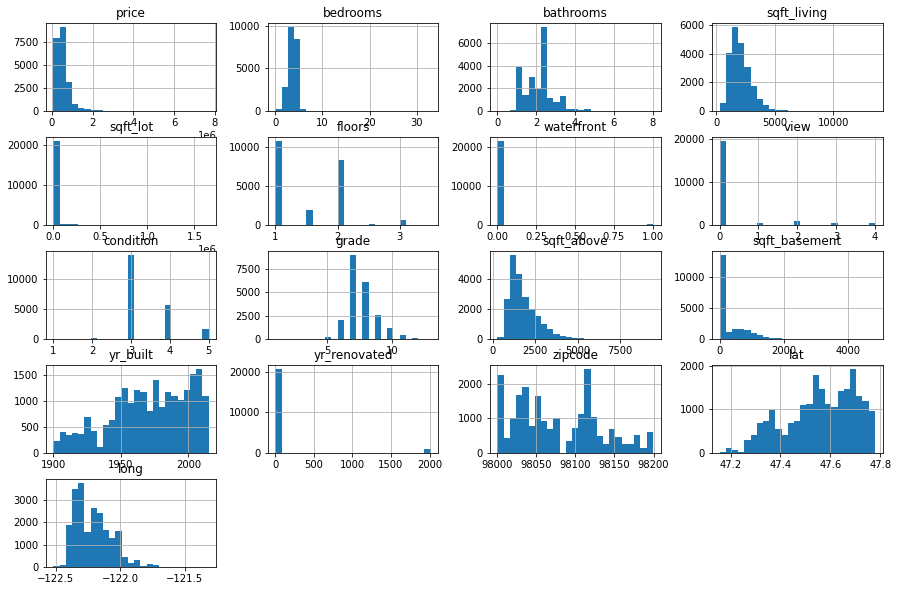

In [ ]:
# YOUR TASK
data.hist(bins = 25, figsize = (15, 10))

1) With the exception of the varaibles grade and condition, the majority of the variables are either left (negative) or right (positive) skewed, meaning that the values are distributed to either side of the graph. In the case of a positive skew, the mean and median are larger than the mode, which is the opposite case for the negative skew.

2) The scales of different variables differ according to their input and ranges. For example, yr_built can have values of 1950 or 2000, however it would be unlogical for the latitude variable to have the same scale. 

3) It is noticeable that the variable yr_renovated is strongly negatively skewed. This is because the majority of houses have not been renovated yet, meaning that the mode is 0.

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [ ]:
# Some Data Cleaning, using pandas because it makes processes such as data cleansing easier
data['date'] = pd.to_datetime(data['date']) #converting it to actual dates like in excel
data['renovated'] = pd.cut(data['yr_renovated'], bins = [-1, 0, 3000], labels = [0, 1]) # bin value must be one less than label value
data['yr_renovated'] =  data[["yr_renovated", "yr_built"]].max(axis = 1)

##Create a Test Set

Try to explain what a *stratified sampling* is. Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

1) Stratified Sampling is a type of sampling in which the samples are collected to represent overall data, which usually results in biased samples.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

data['extra_column'] = pd.cut(data['price'], bins = [data['price'].min(), np.percentile(data['price'], 25), np.percentile(data['price'], 50), np.percentile(data['price'], 75), data['price'].max()], labels = ['cheap', 'affordable', 'average', 'expensive'])
train_set, test_set = train_test_split(data, test_size = 0.33, random_state = 42)

#train_set = ?
#test_set = ?

In [ ]:
data = train_set.copy()
data.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,extra_column
8240,2015-04-22,580000.0,5,2.50,2500,11900,1.0,0,0,3,7,1400,1100,1963,1963,98007,47.5915,-122.132,0,average
8356,2014-12-12,585000.0,4,2.50,2430,6766,2.0,0,0,3,8,2430,0,1999,1999,98177,47.7294,-122.358,0,average
1207,2014-09-04,651000.0,3,2.00,1940,6440,1.0,0,2,5,7,970,970,1940,1940,98116,47.5664,-122.389,0,expensive
10313,2015-03-04,550500.0,2,1.50,930,7400,1.0,0,2,4,7,830,100,1909,1909,98116,47.5691,-122.408,0,average
16001,2015-02-17,500000.0,3,1.75,1780,11096,1.0,0,0,3,7,1210,570,1979,1979,98074,47.6170,-122.051,0,average
1803,2015-04-23,1135000.0,4,3.25,4130,11444,2.0,0,0,3,11,4130,0,2001,2001,98059,47.5208,-122.150,0,expensive
4289,2014-06-12,585000.0,3,2.50,1910,1501,2.5,0,0,3,8,1530,380,2007,2007,98199,47.6441,-122.385,0,average
7085,2015-04-02,318200.0,3,2.50,1990,3644,2.0,0,0,3,7,1990,0,2010,2010,98038,47.3531,-122.017,0,cheap
8650,2014-09-12,510000.0,3,1.75,1920,43560,1.0,0,0,4,7,1340,580,1962,1962,98074,47.6052,-122.044,0,average
597,2014-10-02,595000.0,3,2.50,3370,14402,2.0,0,2,3,9,3370,0,2004,2004,98045,47.5008,-121.776,0,average


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

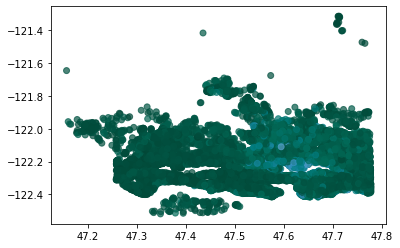

In [ ]:
plt.scatter(data['lat'], data['long'], c = data['price'], alpha = 0.7)
plt.set_cmap('PuBuGn_r')

### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. How can the values of this correlation effect be interpreted? What are probably the best variables to predict? For which variables does the Pearson coefficient make sense and for which not?

1) Pearson's correlation coefficient shows the dependency of two variables and how these influence each other. 

2) The most important values to predict are those relating to the price, which would allow us to check which variables have affect the price. On the other hand, calculating the correlation coefficient for the variables latitude, longitude, views, and the date would not make sense as these are fixed variables and have no influence on others. Variables such as yr_renovated, waterfront, square footage, etc. are important as these have a direct impact on the price of the house.

In [ ]:
correlation_psqfliv = np.corrcoef(data['price'], data['sqft_living'])
print(correlation_psqfliv)

correlation_psqflot = np.corrcoef(data['price'], data['sqft_lot'])
print(correlation_psqflot)

correlation_pwf = np.corrcoef(data['price'], data['waterfront'])
print(correlation_pwf)

correlation_pzc = np.corrcoef(data['price'], data['zipcode'])
print(correlation_pzc)

correlation_pc = np.corrcoef(data['price'], data['condition'])
print(correlation_pc)

data.corr()

[[1.         0.70203505]
 [0.70203505 1.        ]]
[[1.         0.08966086]
 [0.08966086 1.        ]]
[[1.         0.26636943]
 [0.26636943 1.        ]]
[[ 1.         -0.05320285]
 [-0.05320285  1.        ]]
[[1.         0.03636179]
 [0.03636179 1.        ]]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.105755,-0.053203,0.307003,0.021626
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.165506,-0.152668,-0.008931,0.129473
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.537164,-0.203866,0.024573,0.223042
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.343745,-0.199430,0.052529,0.240223
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.052911,-0.129574,-0.085683,0.229521
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.505408,-0.059121,0.049614,0.125419
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,-0.000537,0.030285,-0.014274,-0.041910
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,-0.018264,0.084827,0.006157,-0.078400
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.396358,0.003026,-0.014941,-0.106500
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.460796,-0.184862,0.114084,0.198372


Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

1) It is noticeable that the variables sqft_living, sqft_above and sqft_basement each contain points in the matrix that when interacting with each other create a nearly straight line. 

array([[<Axes: xlabel='sqft_above', ylabel='sqft_above'>,
        <Axes: xlabel='sqft_basement', ylabel='sqft_above'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_above'>,
        <Axes: xlabel='sqft_lot', ylabel='sqft_above'>,
        <Axes: xlabel='bedrooms', ylabel='sqft_above'>,
        <Axes: xlabel='bathrooms', ylabel='sqft_above'>,
        <Axes: xlabel='waterfront', ylabel='sqft_above'>],
       [<Axes: xlabel='sqft_above', ylabel='sqft_basement'>,
        <Axes: xlabel='sqft_basement', ylabel='sqft_basement'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_basement'>,
        <Axes: xlabel='sqft_lot', ylabel='sqft_basement'>,
        <Axes: xlabel='bedrooms', ylabel='sqft_basement'>,
        <Axes: xlabel='bathrooms', ylabel='sqft_basement'>,
        <Axes: xlabel='waterfront', ylabel='sqft_basement'>],
       [<Axes: xlabel='sqft_above', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_basement', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living', ylabel='s

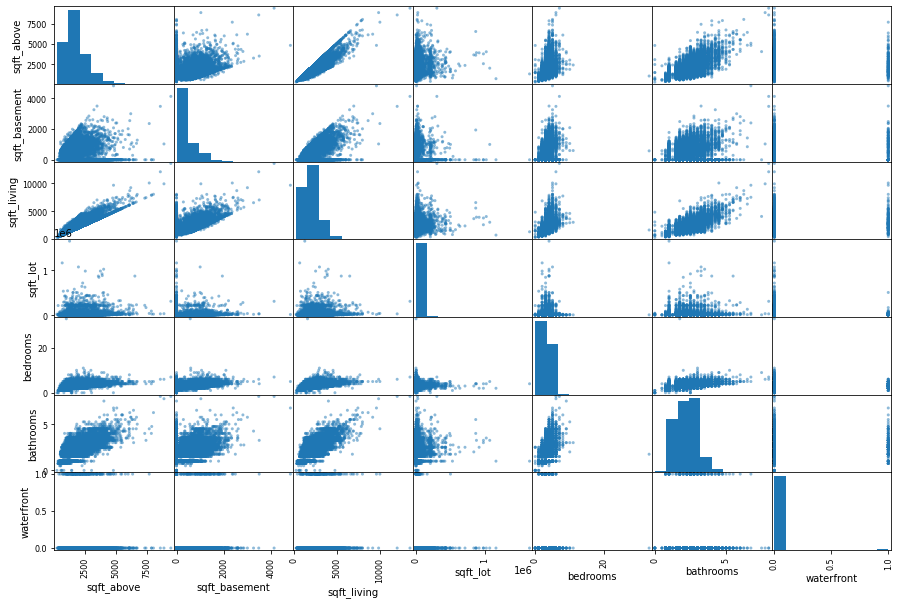

In [ ]:
#pd.plotting.scatter_matrix(data)
pd.plotting.scatter_matrix(data[['sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'waterfront']], figsize = [15, 10])

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


In [ ]:
data['bedroom_density'] = data['bedrooms'] / data['sqft_living']
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,bedroom_density
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.105755,-0.053203,0.307003,0.021626,-0.468367
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.165506,-0.152668,-0.008931,0.129473,0.062749
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.537164,-0.203866,0.024573,0.223042,-0.517869
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.343745,-0.199430,0.052529,0.240223,-0.678042
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.052911,-0.129574,-0.085683,0.229521,-0.137271
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.505408,-0.059121,0.049614,0.125419,-0.312995
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,-0.000537,0.030285,-0.014274,-0.041910,-0.087301
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,-0.018264,0.084827,0.006157,-0.078400,-0.220833
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.396358,0.003026,-0.014941,-0.106500,0.089792
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.460796,-0.184862,0.114084,0.198372,-0.590345


##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [ ]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()

###Missing Data

What options do we have to deal with missing values? What options do we have to deal with missing values? Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

1) When dealing with missing values, there are a few different possibilities on how to act. The attribute that is missing values can be discarded or ignored altogether, the single missing instances can be ignored, the missing values can be substituted or filled (with median values for example), or a second model can be created to and trained without the missing feature while the original stays the way it is.

2) Simpleimputer is a class that allows users to save the median value, for example, for missing values on different sets and data that the model works with. 



In [ ]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = "median")

# dropna() = analyze and show rows and columns with null values
missing_data = data.dropna(axis = 1, how = 'any')
print(missing_data)


            date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0

###Handling Text and Categorical Attributes

> Indented block




What are ordinal and categorical data? Do we have such data in our data set? What possibilities do we have to transform this data correctly? What are dummy attributes? Try to understand what the function *OneHotEncoder()* does with the variable waterfront.

1) Categorical data has a limited number of possibilites, for example yes or no / 1 or 0), ordinal, on the other hand, is structured or ordered categories, such as low- high / good- bad. As seen in the first exercise, we see this in waterfront, yr_renovated, zipcode are categorical types of data, whereas grade and condition are ordinal.

2) In order to transform this data we can use a OneHotEncoder class that can change the values of categorical variables into one-hot vectors.

3) Dummy attricutes are the outcome of categorical values that have been converted accordingly using the OneHotEncoder.

4) By using the OneHotEncoder function on the waterfront variable, this will be turned into a one-hot vector, meaning that its values will be converted from categorical to either 1 = hot or 0 = cold.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

waterfront_encoded = cat_encoder.fit_transform(data)

##Feature Scaling and Transformation

What is min-max scaling and standardization of features? What is a heavy tail in a distribution? What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

1) Min-Max scaling and standardization of features are the process at which one can apply the same scale to all attributes in a dataset. In min-max scaling each value of an attribute is modified to range between 0 to 1. Standardization however does not limit the values to a range but rather working with the attributes mean and standard deviation by subtracting the mean value and dividing the outcome by the standard deviation.

2) Heavy tails describe a dataset in which the values are skewed on the right and stray further from the mean. The problem here is that both of the methods mentioned above are unable to fully deal with this problem and will limit most values in a narrow range. This can be avoided by making the positive features symmetrical by replacing the feature with its square root. One example of a heavy tailed distribution is the "Kolmogorov test" as these approach zero slower than the normal distribution and tend to high valued outliers.


In [ ]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'renovated', 'extra_column', 'bedroom_density'],
      dtype='object')

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess! Try to understand the following two code blocks, how are the variables *long* and *lat* converted?

1) According to pevious answers, I think it would make sense to convert ordinal variables, such as grade, waterfront, or conditions using OneHotEncounter, as well as the variables latitude and longitude, which would allow for better comparison or analysis.

2) The variables lat and long are converted in accordance to the price using clusters.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


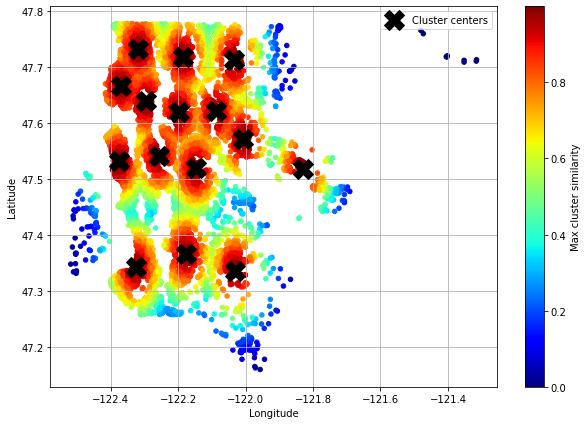

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made? What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?

1) In the following code, certain variables ("normal" or "log") have been transformed using standardized scaling. Latitude and longitude were transformed according to geological categories with clusters, whereas waterfront and renovated according to categories, using functions such as OneHotEncoder.

2) Using pipeline classes for transformations has the advantage that the sequence of variable transformation is in the correct order, which is important for the execution. Transforming variables also allows for a better analysis. 

3) Comparing this solution to my guess, I would expand my conversion, as my guess did not include the conversion of normal or logs using standardized scaling or the transformation of latitude and logitude.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

How many features do we have for predicition?

1) According to code # 22, there are 31 features available for prediction.

In [ ]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


(21613, 31)

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

1) Code 27 uses the previously transformed data for a linear regression. In lin_reg the pipeline class transforms and processes the data that is later used in the linear regression model. Finally, the result is stored in data_predictions.

In [ ]:
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

1) After conducting this analysis, it is clear that some parts of the model work well, while others do not. The root mean squared error is supposed to give insight into the prices of the houses which when looking at this number it does not do well. On the other hand, many of the mean values are similar (predicted and true values) which points to a successful execution.

In [ ]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
median_true = np.median(np.exp(data_label_transformed))
median_pred = np.median(np.exp(data_predictions))

medae = median_absolute_error(np.exp(data_label_transformed), np.exp(data_predictions))
rmse = mean_squared_error(np.exp(data_label_transformed), np.exp(data_predictions), squared = False)

print('True Median = ', median_true)
print('Predicted Median = ', median_pred)
print('Median Absolute Error = ', medae)
print('Root Mean Squared Error = ', rmse)

True Median =  450000.00000000035
Predicted Median =  458438.09388302267
Median Absolute Error =  50521.55818761373
Root Mean Squared Error =  138836.7003931285


###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation? Why have I adjusted the R squared error with a separate function? What is the function *np.ravel* doing?

1) During cross validation, the code randomly splits the training set into 10 "folds" and uses this to train and evaluate the model as many times as it is split up. All but one folds are used for evaluation while the others are used for training the model.

2) The function np.ravel is used when working with bordering, one dimensional arrays. Here, it helps transform arrays into one dimenional arrays.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, t

The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

In [ ]:
pd.Series(forest_rmses).describe()

count        10.000000
mean    -126776.953223
std       12488.473415
min     -155526.003646
25%     -130809.044310
50%     -122302.008270
75%     -121117.221329
max     -110506.277084
dtype: float64

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do. What are the advantages of each method. For which parameters would this make sense in our example?

1) The methods grid search and random search are used to fine tune the machine learning model. Grid search has the advantage that one does not need to manually adjust hyperparameters. This is automated using Grid Search within the code. Similarly, the Random Search method takes the manual labor away from the programmer by ramdonly selecting hyperparameters, usually preferred when working with large datasets or search space.

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [ ]:
tset_data_x = test_set.drop("price", axis=1)
tset_data_label_y = test_set[["price"]].copy()

test_data_label = preprocessing_label.fit_transform(data_label)
#prediction = 

#final_model_eval = lin_reg.predict(tset_data_x?)

"""

median_true = np.median(np.exp(data_label_transformed))
median_pred = np.median(np.exp(data_predictions))

medae = median_absolute_error(np.exp(data_label_transformed), np.exp(data_predictions))
rmse = mean_squared_error(np.exp(data_label_transformed), np.exp(data_predictions), squared = False)

print('Tested True Median = ', median_true)
print('Tested Predicted Median = ', median_pred)
print('Tested Median Absolute Error = ', medae)
print('Tested Root Mean Squared Error = ', rmse)
"""

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


"\n\nmedian_true = np.median(np.exp(data_label_transformed))\nmedian_pred = np.median(np.exp(data_predictions))\n\nmedae = median_absolute_error(np.exp(data_label_transformed), np.exp(data_predictions))\nrmse = mean_squared_error(np.exp(data_label_transformed), np.exp(data_predictions), squared = False)\n\nprint('Tested True Median = ', median_true)\nprint('Tested Predicted Median = ', median_pred)\nprint('Tested Median Absolute Error = ', medae)\nprint('Tested Root Mean Squared Error = ', rmse)\n"

##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

Why is it possible that we need a monitoring code?

Try to save our learned model so that we can reload it at any time.

1) In order to save and reload our model, the "joblib" package is a great fit. 

2) Monitoring code is used when wanting to view changes and processes that have taken place throughout the pipeline, making it easier for anyone involved to comprehend.

In [ ]:
import joblib
joblib.dump(forest_reg, 'King County House Prices')

##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 